# Install and require Noj

In [1]:
(require '[clojupyter.misc.helper :as helper])
(def _ (helper/add-dependencies '[org.scicloj/noj "2-beta9.1"]))

 

#'user/_

In [2]:
;(def _ (helper/add-dependencies '[org.scicloj/kindly  "4-beta14"]))
;(def _ (helper/add-dependencies '[org.scicloj/kindly-advice  "1-beta12"]))


In [3]:
(require '[scicloj.kindly.v4.kind :as kind]
         '[tablecloth.api :as tc])

nil

# Plain values
    

In [4]:
(+  4 5)

9

In [5]:
(str "abcd" "efgh")



abcdefgh

# Plain data structures

In [6]:
(list 1 "A" :B 'C)

1 A :B C

In [7]:
(range 9)

0 1 2 3 4 5 6 7 8

In [8]:
[1 "A" :B 'C]

1 A :B C

In [9]:
#{1 "A" :B 'C}
    

1 :B C A

In [10]:
#{1 "A" :B 'C}

1 :B C A

In [11]:
(def people-as-maps
  (->> (range 29)
       (mapv (fn [i]
               {:preferred-language (["clojure" "clojurescript" "babashka"]
                                     (rand-int 3))
                :age (rand-int 100)}))))
(take 5 people-as-maps)

:preferred-language clojure :age 63 :preferred-language clojure :age 68 :preferred-language clojurescript :age 11 :preferred-language clojure :age 77 :preferred-language clojurescript :age 82

In [12]:
(def people-as-vectors
  (->> people-as-maps
       (mapv (juxt :preferred-language :age))))
(take 5 people-as-vectors)

clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82

In [13]:
[(kind/hiccup
  [:div {:style
         {:background-color "floralwhite"}}
   [:p "hello"]])
 (kind/md
  "hello *hello* **hello**")
 (kind/code
  "(defn f [x] (+  x 9))")]

hello hello hello hello <(defn f [x] (+ x 9))></(defn f [x] (+ x 9))>

In [14]:
{:x  (kind/md
      "**hello**")
 (kind/md
  "**hello**") :x}

:x hello hello :x

In [15]:
{:vector-of-numbers [2 9 -1]
 :vector-of-different-things ["hi"
                              (kind/hiccup
                               [:big [:big "hello"]])]
 :map-of-different-things {:markdown (kind/md ["*hi*, **hi**"])
                           :number 9999}
 :hiccup (kind/hiccup
          [:big [:big "bye"]])
 :dataset (tc/dataset {:x (range 3)
                       :y [:A :B :C]})}

:vector-of-numbers 2 9 -1 :vector-of-different-things hi hello :map-of-different-things :markdown hi , hi :number 9999 :hiccup bye :dataset _unnamed [3 2]: :x :y 0 :A 1 :B 2 :C

# :kind/seq

In [16]:
(kind/seq [1 2 3 4])

1 2 3 4

# :kind/vector    

In [17]:
(kind/vector [1 2 3])

1 2 3

# :kind/map

In [18]:
(kind/map {1 "A" :B 'C})

1 A :B C

# :kind/set

In [19]:
(kind/set #{1 2 3})

1 3 2

# :kind/hidden


In [20]:
(kind/hidden
 {:x 9})

# :kind/md


In [21]:
(kind/md
     "
* This is [markdown](https://www.markdownguide.org/).
   * *Isn't it??*
* Here is **some more** markdown."
      
    )

This is markdown . Isn't it?? Here is some more markdown.

In [22]:
(def m
    (kind/md
"
* This is [markdown](https://www.markdownguide.org/).
    * *Isn't it??*
    * Here is **some more** markdown.
"
    ))
m

This is markdown . Isn't it?? Here is some more markdown.

In [23]:
(kind/md
 "If $x$ equals 9, then $$x^2+9=90$$")

If x equals 9, then x^2+9=90

In [24]:
(kind/md "*123*")

123

In [25]:
(do (def m (kind/md "**123**")) m)

123

In [26]:
(def m (kind/md "_123_")) 
m

123

In [27]:
^kind/md
["hello *hello* **hello**"]

hello hello hello

# :kind/tex

In [28]:
(def tex
 (kind/tex "x^2=\\alpha"))
tex

In [29]:
(kind/tex "\\sum_{i=1}^\\infty\\frac{1}{n^2}
=\\frac{\\pi^2}{6}")

# :kind/code

In [30]:
(kind/code
 "(defn f [x] {:y (+  x 9)})")

<(defn f [x] {:y (+ x 9)})></(defn f [x] {:y (+ x 9)})>

In [31]:
^kind/tex ["x^2=\\alpha"]

# :kind/edn

# :kind/hiccup

In [32]:
(def hello-hiccup
  (kind/hiccup
   [:ul
    [:li [:p "hi"]]
    [:li [:big
          [:big
           [:p {:style
                ;; https://www.htmlcsscolor.com/hex/7F5F3F
                {:color "#7F5F3F"}}
            "hello"]]]]]))
hello-hiccup

hi hello

In [33]:
(kind/hiccup
 [:div {:style
        {:background-color "#eeddee"
         :border-style "solid"}}
  [:p {:style {:background-color "#ccddcc"
               :border-style "solid"}}
   "hello"]
  (kind/md
   "hello *hello* **hello**")
  (kind/code
   "(defn f [x] (+  x 9))")])

hello hello hello hello <(defn f [x] (+ x 9))></(defn f [x] (+ x 9))>

# :Kind/reagent

In [34]:
(kind/reagent
 ['(fn [numbers]
     [:p {:style {:background "#d4ebe9"}}
      (pr-str (map inc numbers))])
  (vec (range 10))])

In [35]:
(kind/scittle
 '(defn f [x]
    (+ x 9)))

In [36]:
(kind/reagent
 ['(fn []
     [:p (f 20)])])

In [37]:
(kind/reagent
 ['(fn [{:keys [spec0
                transition
                time-for-transition]}]
     (let [*spec (reagent.core/atom spec0)]
       (fn []
         ^{:key @*spec}
         [:div
          [:div {:style {:height "400px"}
                 :ref (fn [el]
                        (when el
                          (let [chart (.init js/echarts el)]
                            (.setOption chart (clj->js @*spec)))))}]
          (js/setInterval #(swap! *spec transition) time-for-transition)
          ;; Include this to force component update:
          [:p {:style {:display :none}}
           (hash @*spec)]])))
  {:spec0 {:title {:text "Echarts Example"}
           :tooltip {}
           :legend {:data ["sales"]}
           :xAxis {:data ["Shirts", "Cardigans", "Chiffons",
                          "Pants", "Heels", "Socks"]}
           :yAxis {}
           :series [{:name "sales"
                     :type "bar"
                     :data [5 20 36
                            10 10 20]}]}
   :transition '(fn [spec]
                  (update-in spec
                             [:series 0 :data]
                             (partial map #(+ %
                                              (rand-int 10)
                                              -5))))
   :time-for-transition 1000}]
 {:html/deps [:kind/echarts]})

In [38]:
(kind/reagent
 ['(fn []
     [:div {:style {:height "200px"}
            :ref (fn [el]
                   (let [m (-> js/L
                               (.map el)
                               (.setView (clj->js [51.505 -0.09])
                                         13))]
                     (-> js/L
                         .-tileLayer
                         (.provider "OpenStreetMap.Mapnik")
                         (.addTo m))
                     (-> js/L
                         (.marker (clj->js [51.5 -0.09]))
                         (.addTo m)
                         (.bindPopup "A pretty CSS popup.<br> Easily customizable.")
                         (.openPopup))))}])]
 ;; Note we need to mention the dependency:
 {:html/deps [:leaflet]})

In [39]:
(kind/reagent
 ['(fn []
     (let [*click-count (reagent.core/atom 0)]
       (fn []
         [:div
          "The atom " [:code "*click-count"] " has value: "
          @*click-count ". "
          [:input {:type "button" :value "Click me!"
                   :on-click #(swap! *click-count inc)}]])))])

# :kind/html


In [40]:
(kind/html
 "<div style='height:40px; width:40px; background:purple'></div> ")

In [41]:
(kind/html
 "
<svg height=100 width=100>
<circle cx=50 cy=50 r=40 stroke='purple' stroke-width=3 fill='floralwhite' />
</svg> ")

# :kind/vega

In [42]:
(repeat 4
(kind/vega
 {:$schema "https://vega.github.io/schema/vega/v5.json"
  :width 400
  :height 200
  :padding 5
  :data {:name "table"
         :values [{:category :A :amount 28}
                  {:category :B :amount 55}
                  {:category :C :amount 43}
                  {:category :D :amount 91}
                  {:category :E :amount 81}
                  {:category :F :amount 53}
                  {:category :G :amount 19}
                  {:category :H :amount 87}]}
  :signals [{:name :tooltip
             :value {}
             :on [{:events "rect:mouseover"
                   :update :datum}
                  {:events "rect:mouseout"
                   :update "{}"}]}]
  :scales [{:name :xscale
            :type :band
            :domain {:data :table
                     :field :category}
            :range :width
            :padding 0.05
            :round true}
           {:name :yscale
            :domain {:data :table
                     :field :amount}
            :nice true
            :range :height}]
  :axes [{:orient :bottom :scale :xscale}
         {:orient :left :scale :yscale}]
  :marks {:type :rect
          :from {:data :table}
          :encode {:enter {:x {:scale :xscale
                               :field :category}
                           :width {:scale :xscale
                                   :band 1}
                           :y {:scale :yscale
                               :field :amount}
                           :y2 {:scale :yscale
                                :value 0}}
                   :update {:fill
                            {:value :steelblue}}
                   :hover {:fill
                           {:value :red}}}}}))

# :kind/vega-lite

In [43]:
(def vega-lite-plot
  (kind/vega-lite
   {:encoding
    {:y {:field "y", :type "quantitative"},
     :size {:value 400},
     :x {:field "x", :type "quantitative"}},
    :mark {:type "circle", :tooltip true},
    :width 400,
    :background "floralwhite",
    :height 100,
    :data {:values "x,y\n1,1\n2,-4\n3,9\n", :format {:type "csv"}}}))
vega-lite-plot

# :kind/cytoscape

In [44]:
(kind/cytoscape
 {:elements {:nodes [{:data {:id "a" :parent "b"} :position {:x 215 :y 85}}
                     {:data {:id "b"}}
                     {:data {:id "c" :parent "b"} :position {:x 300 :y 85}}
                     {:data {:id "d"} :position {:x 215 :y 175}}
                     {:data {:id "e"}}
                     {:data {:id "f" :parent "e"} :position {:x 300 :y 175}}]
             :edges [{:data {:id "ad" :source "a" :target "d"}}
                     {:data {:id "eb" :source "e" :target "b"}}]}
  :style [{:selector "node"
           :css {:content "data(id)"
                 :text-valign "center"
                 :text-halign "center"}}
          {:selector "parent"
           :css {:text-valign "top"
                 :text-halign "center"}}
          {:selector "edge"
           :css {:curve-style "bezier"
                 :target-arrow-shape "triangle"}}]
  :layout {:name "preset"
           :padding 5}})

# :kind/echarts

In [45]:
(kind/echarts
 {:title {:text "Echarts Example"}
  :tooltip {}
  :legend {:data ["sales"]}
  :xAxis {:data ["Shirts", "Cardigans", "Chiffons",
                 "Pants", "Heels", "Socks"]}
  :yAxis {}
  :series [{:name "sales"
            :type "bar"
            :data [5 20 36
                   10 10 20]}]})

# :kind/plotly


In [46]:
(def plotly-example 
    (let [n 20
       walk (fn [bias]
              (->> (repeatedly n #(-> (rand)
                                      (- 0.5)
                                      (+ bias)))
                   (reductions +)))]
   {:data [{:x (walk 1)
            :y (walk -1)
            :z (map #(* % %)
                    (walk 2))
            :type :scatter3d
            :mode :lines+markers
            :opacity 0.2
            :line {:width 10}
            :marker {:size 20
                     :colorscale :Viridis}}]}))
(kind/plotly plotly-example)

In [47]:
(-> plotly-example
    (kind/plotly {:style
                  {:width "100px"
                   :height "100px"}}))

# :kind/highcharts

In [48]:
(kind/highcharts
 {:title {:text "Line chart"}
  :subtitle {:text "By Job Category"}
  :yAxis {:title {:text "Number of Employees"}}
  :series [{:name "Installation & Developers"
            :data [43934, 48656, 65165, 81827, 112143, 142383,
                   171533, 165174, 155157, 161454, 154610]}

           {:name "Manufacturing",
            :data [24916, 37941, 29742, 29851, 32490, 30282,
                   38121, 36885, 33726, 34243, 31050]}

           {:name "Sales & Distribution",
            :data [11744, 30000, 16005, 19771, 20185, 24377,
                   32147, 30912, 29243, 29213, 25663]}

           {:name "Operations & Maintenance",
            :data [nil, nil, nil, nil, nil, nil, nil,
                   nil, 11164, 11218, 10077]}

           {:name "Other",
            :data [21908, 5548, 8105, 11248, 8989, 11816, 18274,
                   17300, 13053, 11906, 10073]}]

  :xAxis {:accessibility {:rangeDescription "Range: 2010 to 2020"}}

  :legend {:layout "vertical",
           :align "right",
           :verticalAlign "middle"}

  :plotOptions {:series {:label {:connectorAllowed false},
                         :pointStart 2010}}

  :responsive {:rules [{:condition {:maxWidth 500},
                        :chartOptions {:legend {:layout "horizontal",
                                                :align "center",
                                                :verticalAlign "bottom"}}}]}})

# :kind/observable

In [49]:
(kind/observable
 "athletes = FileAttachment('notebooks/datasets/athletes.csv').csv({typed: true})")

Unimplemented: :kind/observable ["athletes = FileAttachment('notebooks/datasets/athletes.csv').csv({typed: true})"]

In [50]:
(kind/observable
 "athletes")

Unimplemented: :kind/observable ["athletes"]

In [51]:
(kind/observable
 "
Plot.plot({
  grid: true,
  facet: {
    data: athletes,
    y: 'sex'
  },
  marks: [
    Plot.rectY(
      athletes,
      Plot.binX({y: 'count'}, {x: 'weight', fill: 'sex'})
    ),
    Plot.ruleY([0])
  ]
})
")

Unimplemented: :kind/observable ["\nPlot.plot({\n grid: true,\n facet: {\n data: athletes,\n y: 'sex'\n },\n marks: [\n Plot.rectY(\n athletes,\n Plot.binX({y: 'count'}, {x: 'weight', fill: 'sex'})\n ),\n Plot.ruleY([0])\n ]\n})\n"]

In [52]:
(kind/observable
 "population = FileAttachment('notebooks/datasets/population.json').json()")

Unimplemented: :kind/observable ["population = FileAttachment('notebooks/datasets/population.json').json()"]

In [53]:
(kind/observable
 "population")

Unimplemented: :kind/observable ["population"]

In [54]:
(kind/observable
 " import { chart } with { population as data } from '@d3/zoomable-sunburst'
 chart")

Unimplemented: :kind/observable [" import { chart } with { population as data } from '@d3/zoomable-sunburst'\n chart"]

In [55]:
(kind/observable
 "
//| panel: input
viewof bill_length_min = Inputs.range(
                                      [32, 50],
                                      {value: 35, step: 1, label: 'Bill length (min):'}
                                      )
viewof islands = Inputs.checkbox(
                                 ['Torgersen', 'Biscoe', 'Dream'],
                                 { value: ['Torgersen', 'Biscoe'],
                                  label: 'Islands:'
                                  }
                                 )

Plot.rectY(filtered,
            Plot.binX(
                      {y: 'count'},
                      {x: 'body_mass_g', fill: 'species', thresholds: 20}
                      ))
 .plot({
        facet: {
                data: filtered,
                x: 'sex',
                y: 'species',
                marginRight: 80
                },
        marks: [
                Plot.frame(),
                ]
        }
       )
Inputs.table(filtered)
data = FileAttachment('notebooks/datasets/palmer-penguins.csv').csv({ typed: true })
filtered = data.filter(function(penguin) {
                                           return bill_length_min < penguin.bill_length_mm &&
                                           islands.includes(penguin.island);
                                           })
")

Unimplemented: :kind/observable ["\n//| panel: input\nviewof bill_length_min = Inputs.range(\n [32, 50],\n {value: 35, step: 1, label: 'Bill length (min):'}\n )\nviewof islands = Inputs.checkbox(\n ['Torgersen', 'Biscoe', 'Dream'],\n { value: ['Torgersen', 'Biscoe'],\n label: 'Islands:'\n }\n )\n\nPlot.rectY(filtered,\n Plot.binX(\n {y: 'count'},\n {x: 'body_mass_g', fill: 'species', thresholds: 20}\n ))\n .plot({\n facet: {\n data: filtered,\n x: 'sex',\n y: 'species',\n marginRight: 80\n },\n marks: [\n Plot.frame(),\n ]\n }\n )\nInputs.table(filtered)\ndata = FileAttachment('notebooks/datasets/palmer-penguins.csv').csv({ typed: true })\nfiltered = data.filter(function(penguin) {\n return bill_length_min < penguin.bill_length_mm &&\n islands.includes(penguin.island);\n })\n"]

# :kind/video

In [56]:
(kind/video
 {:youtube-id "DAQnvAgBma8"})

In [57]:
(kind/video
 {:youtube-id "DAQnvAgBma8"
  :allowfullscreen false})

In [58]:
(kind/video
 {:youtube-id "DAQnvAgBma8"
  :iframe-width 480
  :iframe-height 270})

In [59]:
(kind/video
 {:youtube-id "DAQnvAgBma8"
  :embed-options {:mute 1
                  :controls 0}})

# :kind/image

without "kind":

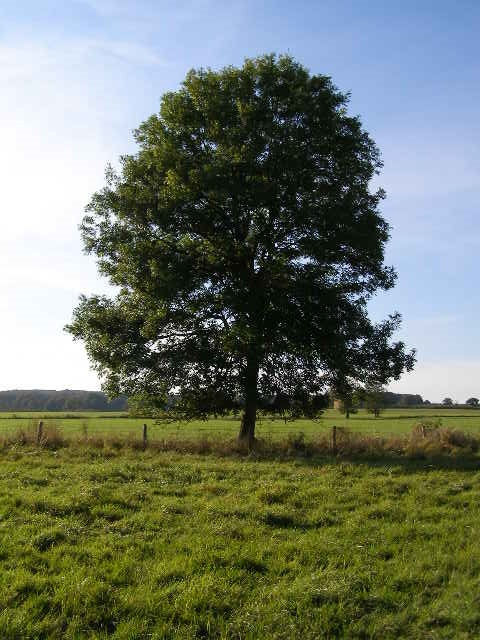

In [60]:
(defonce tree-image
  (->  "https://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg"
       (java.net.URL.)
       (javax.imageio.ImageIO/read)))
tree-image

with "kind"


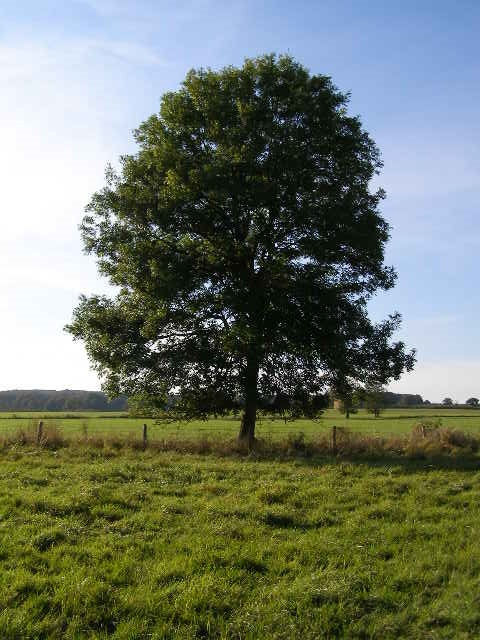

In [61]:
(kind/image tree-image)

inside hiccup


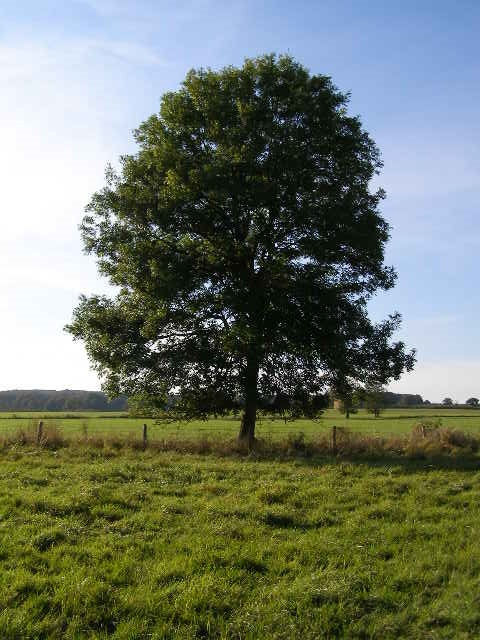

In [62]:
(kind/hiccup [:div.clay-limit-image-width
                       tree-image])


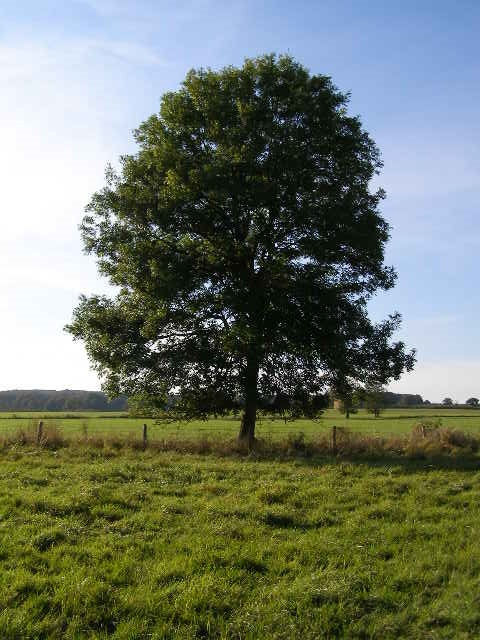
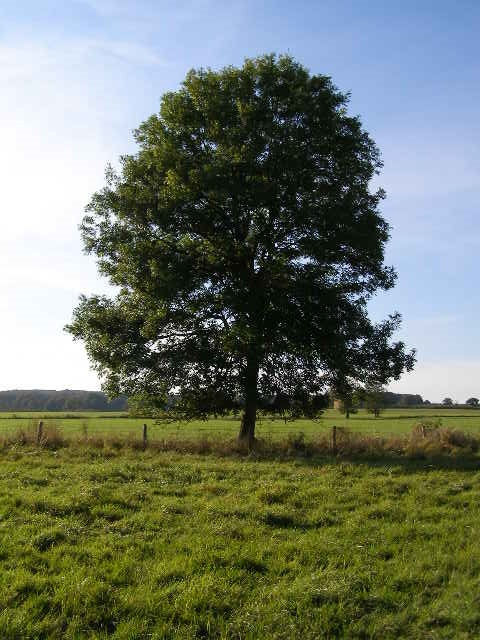

In [63]:
[tree-image tree-image]

# :kind/dataset


In [64]:
(def squares-dataset
  (-> {:x (range 25)}
      tc/dataset
      (tc/map-columns :y
                      [:x]
                      (fn [x]
                        (* x x)))))

#'user/squares-dataset

without "kind"

In [65]:
(tc/dataset
 {:x [1 [2 3] 4]
  :y [:A :B :C]})

_unnamed [3 2]: :x :y 1 :A [2 3] :B 4 :C

with kind

In [66]:
(kind/dataset
(tc/dataset
 {:x [1 [2 3] 4]
  :y [:A :B :C]}))

_unnamed [3 2]: :x :y 1 :A [2 3] :B 4 :C

# :kind/table 

In [67]:
(kind/table
 {:column-names [:preferred-language :age]
  :row-vectors (take 5 people-as-vectors)})

:preferred-language:age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82

In [68]:
(kind/table
 {:row-vectors (take 5 people-as-vectors)})

clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82

In [69]:
(kind/table
 {:row-maps (take 5 people-as-maps)})

In [70]:
(kind/table
 {:column-names [:preferred-language]
  :row-maps (take 5 people-as-maps)})

:preferred-language

In [71]:
(kind/table (take 5 people-as-vectors))

In [72]:
(kind/table (take 5 people-as-maps))

In [73]:
(kind/table {:x (range 6)
             :y [:A :B :C :A :B :C]})

In [74]:
(def people-as-dataset
  (tc/dataset people-as-maps))
(-> people-as-dataset
    kind/table)

_unnamed [29 2]: :preferred-language :age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82 babashka 88 clojurescript 90 babashka 22 clojure 7 clojure 3 ... ... clojurescript 14 babashka 57 babashka 93 clojurescript 56 clojure 48 clojurescript 70 babashka 5 babashka 65 babashka 36 clojure 95 babashka 42

In [75]:
(-> people-as-dataset
    (kind/table {:element/max-height "300px"}))

_unnamed [29 2]: :preferred-language :age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82 babashka 88 clojurescript 90 babashka 22 clojure 7 clojure 3 ... ... clojurescript 14 babashka 57 babashka 93 clojurescript 56 clojure 48 clojurescript 70 babashka 5 babashka 65 babashka 36 clojure 95 babashka 42

In [76]:
(-> people-as-maps
    tc/dataset
    (kind/table {:use-datatables true}))

_unnamed [29 2]: :preferred-language :age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82 babashka 88 clojurescript 90 babashka 22 clojure 7 clojure 3 ... ... clojurescript 14 babashka 57 babashka 93 clojurescript 56 clojure 48 clojurescript 70 babashka 5 babashka 65 babashka 36 clojure 95 babashka 42

In [77]:
(-> people-as-dataset
    (kind/table {:use-datatables true}))

_unnamed [29 2]: :preferred-language :age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82 babashka 88 clojurescript 90 babashka 22 clojure 7 clojure 3 ... ... clojurescript 14 babashka 57 babashka 93 clojurescript 56 clojure 48 clojurescript 70 babashka 5 babashka 65 babashka 36 clojure 95 babashka 42

In [78]:
(-> people-as-dataset
    (kind/table {:use-datatables true
                 :datatables {:scrollY 200}}))

_unnamed [29 2]: :preferred-language :age clojure 63 clojure 68 clojurescript 11 clojure 77 clojurescript 82 babashka 88 clojurescript 90 babashka 22 clojure 7 clojure 3 ... ... clojurescript 14 babashka 57 babashka 93 clojurescript 56 clojure 48 clojurescript 70 babashka 5 babashka 65 babashka 36 clojure 95 babashka 42

<:x></:x> <:y></:y> some text some more text <{:x (1 2 [3 4])}></{:x (1 2 [3 4])}> _unnamed [3 2]: :x :y 0 1 1 2 2 3 hello
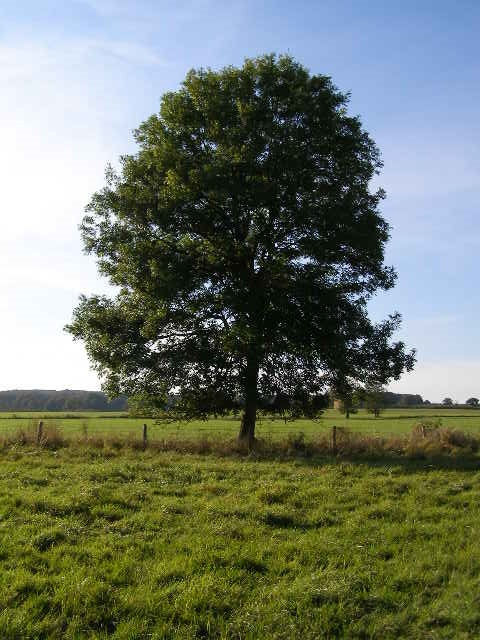

In [79]:
(kind/table
 {:column-names [(kind/code ":x")
                 (kind/code ":y")]
  :row-vectors [[(kind/md "*some text* **some more text**")
                 (kind/code "{:x (1 2 [3 4])}")]
                [(tc/dataset {:x (range 3)
                              :y (map inc (range 3))})
                 vega-lite-plot]
                [(kind/hiccup [:div {:style {:height "200px"
                                             :width "200px"}}
                               tree-image])
                 (kind/md "**hello**")]]})

# :kind/pprint

In [80]:
(->> (range 30)
     (apply array-map)
     kind/pprint)

{0 1,
 2 3,
 4 5,
 6 7,
 8 9,
 10 11,
 12 13,
 14 15,
 16 17,
 18 19,
 20 21,
 22 23,
 24 25,
 26 27,
 28 29}

In [81]:
(->> (range 10)
     (apply array-map))

0 1 2 3 4 5 6 7 8 9

In [82]:
(kind/pprint
 hello-hiccup)

[:ul
 [:li [:p "hi"]]
 [:li [:big [:big [:p {:style {:color "#7F5F3F"}} "hello"]]]]]

In [83]:
(kind/pprint
 tree-image)

[#object[java.awt.image.BufferedImage 0x25cd2b5b "BufferedImage@25cd2b5b: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@439a0c73 transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 480 height = 640 #numDataElements 3 dataOff[0] = 2"]]

In [84]:
(kind/pprint
 kind/dataset)

#function[clojure.lang.AFunction/1]

# :kind/portal

In [85]:
(kind/portal
 {:x (range 3)})

In [86]:
(kind/portal
 [(kind/hiccup [:big [:big "a plot"]])
  vega-lite-plot])

In [87]:
(kind/portal
 [(kind/hiccup [:p {:style {:background-color "#ccddcc"
                            :border-style "solid"}}
                "hello"])
  (kind/md
   "hello *hello* **hello**")
  (kind/code
   "(defn f [x] (+  x 9))")
  vega-lite-plot])

# :kind/fragment


In [88]:
(->> ["purple" "darkgreen" "goldenrod"]
     (mapcat (fn [color]
               [(kind/md (str "### subsection: " color))
                (kind/hiccup [:div {:style {:background-color color
                                            :color "lightgrey"}}
                              [:big [:p color]]])]))
     kind/fragment)

Unimplemented: :kind/fragment (["### subsection: purple"] [:div {:style {:background-color "purple", :color "lightgrey"}} [:big [:p "purple"]]] ["### subsection: darkgreen"] [:div {:style {:background-color "darkgreen", :color "lightgrey"}} [:big [:p "darkgreen"]]] ["### subsection: goldenrod"] [:div {:style {:background-color "goldenrod", :color "lightgrey"}} [:big [:p "goldenrod"]]])

# :kind/fn

In [89]:
(kind/fn {:x 1
          :y 2}
  {:kindly/f (fn [{:keys [x y]}]
               (+ x y))})

3

In [90]:
(kind/fn
  [+ 1 2])

3

In [91]:
(kind/fn
  {:kindly/f (fn [{:keys [x y]}]
               (+ x y))
   :x 1
   :y 2})

3

In [92]:
(kind/fn
  {:x (range 3)
   :y (repeatedly 3 rand)}
  {:kindly/f tc/dataset})

_unnamed [3 2]: :x :y 0 0.04721486 1 0.26618633 2 0.74235567

In [93]:
(kind/fn
  [tc/dataset
   {:x (range 3)
    :y (repeatedly 3 rand)}])

_unnamed [3 2]: :x :y 0 0.69915945 1 0.64122310 2 0.20002369

In [94]:
(kind/fn
  {:kindly/f tc/dataset
   :x (range 3)
   :y (repeatedly 3 rand)})

_unnamed [3 2]: :x :y 0 0.97524848 1 0.08240333 2 0.21702699

# :kind/test-last

In [95]:
(kind/test-last)

:kind/test-last

# :kind/test

In [96]:
(kind/test)

:kind/test

# :kind/var

In [97]:
(kind/var
 '(def a "hello"))

#'user/a

# :kind/emmy-viewers

In [98]:
  (require
   '[scicloj.kindly.v4.kind :as kind]
   '[emmy.env :as e :refer :all #_[D square cube tanh cos sin up down]]
   '[emmy.viewer :as ev]
   '[emmy.mafs :as mafs]
   '[emmy.mathbox.plot :as plot]
   '[emmy.leva :as leva])

nil

In [99]:
(mafs/of-x e/sin {:color :blue})

Unimplemented: :kind/emmy-viewers (reagent.core/with-let [G__44705 (js/Function. "y0001" " return Math.sin(y0001);")] [mafs.plot/OfX {:color :blue, :y G__44705}])

# :kind/scittle

In [100]:
(kind/hiccup [:div {:id "my_text" } "my text"])

my text

In [101]:
(kind/scittle '(-> js/document
    (.getElementById "my_text")
    (.-innerHTML)
    (set! "my MODIFIED text (via clojurescript)"))) 


# :kind/htmlwidgets-ggplotly

In [102]:
(require '[clojure.math :as math])
(defn ->ggplotly-spec [{:keys [layers labels]}]
  (kind/htmlwidgets-ggplotly
   (let [;; assuming a single layer for now:
         {:keys [data xmin xmax ymin ymax]} (first layers)
         ;; an auxiliary function to compute tick values:
         ->tickvals (fn [l r]
                      (let [jump (-> (- r l)
                                     (/ 6)
                                     math/floor
                                     int
                                     (max 1))]
                        (-> l
                            math/ceil
                            (range r jump))))]
     {:x
      {:config
       {:doubleClick "reset",
        :modeBarButtonsToAdd ["hoverclosest" "hovercompare"],
        :showSendToCloud false},
       :layout
       {:plot_bgcolor "rgba(235,235,235,1)",
        :paper_bgcolor "rgba(255,255,255,1)",
        :legend
        {:bgcolor "rgba(255,255,255,1)",
         :bordercolor "transparent",
         :borderwidth 1.88976377952756,
         :font {:color "rgba(0,0,0,1)", :family "", :size 11.689497716895}},
        :xaxis (let [tickvals (->tickvals xmin xmax)
                     ticktext (mapv str tickvals)
                     range-len (- xmax xmin)
                     range-expansion (* 0.1 range-len)
                     expanded-range [(- xmin range-expansion)
                                     (+ xmax range-expansion)]]
                 {:linewidth 0,
                  :nticks nil,
                  :linecolor nil,
                  :ticklen 3.65296803652968,
                  :tickcolor "rgba(51,51,51,1)",
                  :tickmode "array",
                  :gridcolor "rgba(255,255,255,1)",
                  :automargin true,
                  :type "linear",
                  :tickvals tickvals
                  :zeroline false,
                  :title
                  {:text (:x labels),
                   :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187}},
                  :tickfont {:color "rgba(77,77,77,1)", :family "", :size 11.689497716895},
                  :autorange false,
                  :showticklabels true,
                  :showline false,
                  :showgrid true,
                  :ticktext ticktext
                  :ticks "outside",
                  :gridwidth 0.66417600664176,
                  :anchor "y",
                  :domain [0 1],
                  :hoverformat ".2f",
                  :tickangle 0,
                  :tickwidth 0.66417600664176,
                  :categoryarray ticktext,
                  :categoryorder "array",
                  :range expanded-range},)
        :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187},
        :showlegend false,
        :barmode "relative",
        :yaxis (let [tickvals (->tickvals ymin ymax)
                     ticktext (mapv str tickvals)
                     range-len (- ymax ymin)
                     range-expansion (* 0.1 range-len)
                     expanded-range [(- ymin range-expansion)
                                     (+ ymax range-expansion)]]
                 {:linewidth 0,
                  :nticks nil,
                  :linecolor nil,
                  :ticklen 3.65296803652968,
                  :tickcolor "rgba(51,51,51,1)",
                  :tickmode "array",
                  :gridcolor "rgba(255,255,255,1)",
                  :automargin true,
                  :type "linear",
                  :tickvals tickvals,
                  :zeroline false,
                  :title
                  {:text (:y labels),
                   :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187}},
                  :tickfont {:color "rgba(77,77,77,1)", :family "", :size 11.689497716895},
                  :autorange false,
                  :showticklabels true,
                  :showline false,
                  :showgrid true,
                  :ticktext ticktext,
                  :ticks "outside",
                  :gridwidth 0.66417600664176,
                  :anchor "x",
                  :domain [0 1],
                  :hoverformat ".2f",
                  :tickangle 0,
                  :tickwidth 0.66417600664176,
                  :categoryarray ticktext,
                  :categoryorder "array",
                  :range expanded-range},)
        :hovermode "closest",
        :margin
        {:t 25.7412480974125,
         :r 7.30593607305936,
         :b 39.6955859969559,
         :l 37.2602739726027},
        :shapes
        [{:yref "paper",
          :fillcolor nil,
          :xref "paper",
          :y1 1,
          :type "rect",
          :line {:color nil, :width 0, :linetype []},
          :y0 0,
          :x1 1,
          :x0 0}]},
       :highlight
       {:on "plotly_click",
        :persistent false,
        :dynamic false,
        :selectize false,
        :opacityDim 0.2,
        :selected {:opacity 1},
        :debounce 0},
       :base_url "https://plot.ly",
       :cur_data "1f2fea5b54d146",
       :source "A",
       :shinyEvents
       ["plotly_hover"
        "plotly_click"
        "plotly_selected"
        "plotly_relayout"
        "plotly_brushed"
        "plotly_brushing"
        "plotly_clickannotation"
        "plotly_doubleclick"
        "plotly_deselect"
        "plotly_afterplot"
        "plotly_sunburstclick"],
       :attrs {:1f2fea5b54d146 {:x {}, :y {}, :type "scatter"}},
       :data
       [{:y (:y data)
         :hoveron "points",
         :frame nil,
         :hoverinfo "text",
         :marker
         {:autocolorscale false,
          :color "rgba(0,0,0,1)",
          :opacity 1,
          :size 5.66929133858268,
          :symbol "circle",
          :line {:width 1.88976377952756, :color "rgba(0,0,0,1)"}},
         :mode "markers"
         :type "scatter",
         :xaxis "x",
         :showlegend false,
         :yaxis "y",
         :x (:x data)
         :text (-> data
                   (tc/select-columns [:x :y])
                   (tc/rows :as-maps)
                   (->> (mapv pr-str)))}]},
      :evals [],
      :jsHooks []})))

#'user/->ggplotly-spec

In [103]:
(require '[tablecloth.column.api :as tcc])
(let [n 100
      xs (range n)
      ys (reductions + (repeatedly n #(- (rand) 0.5)))
      xmin (tcc/reduce-min xs)
      xmax (tcc/reduce-max xs)
      ymin (tcc/reduce-min ys)
      ymax (tcc/reduce-max ys)
      data (tc/dataset {:x xs
                        :y ys})]
  (->ggplotly-spec
   {:layers [{:data data
              :xmin xmin :xmax xmax
              :ymin ymin :ymax ymax}]
    :labels {:x "wt"
             :y "mpg"}}))

Unimplemented: :kind/htmlwidgets-ggplotly {:x {:config {:doubleClick "reset", :modeBarButtonsToAdd ["hoverclosest" "hovercompare"], :showSendToCloud false}, :layout {:plot_bgcolor "rgba(235,235,235,1)", :paper_bgcolor "rgba(255,255,255,1)", :legend {:bgcolor "rgba(255,255,255,1)", :bordercolor "transparent", :borderwidth 1.88976377952756, :font {:color "rgba(0,0,0,1)", :family "", :size 11.689497716895}}, :xaxis {:linewidth 0, :nticks nil, :linecolor nil, :ticklen 3.65296803652968, :tickcolor "rgba(51,51,51,1)", :tickmode "array", :gridcolor "rgba(255,255,255,1)", :automargin true, :type "linear", :tickvals (0.0 16.0 32.0 48.0 64.0 80.0 96.0), :zeroline false, :title {:text "wt", :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187}}, :tickfont {:color "rgba(77,77,77,1)", :family "", :size 11.689497716895}, :autorange false, :showticklabels true, :showline false, :showgrid true, :ticktext ["0.0" "16.0" "32.0" "48.0" "64.0" "80.0" "96.0"], :ticks "outside", :gridwidth 0.66417600664176, :anchor "y", :domain [0 1], :hoverformat ".2f", :tickangle 0, :tickwidth 0.66417600664176, :categoryarray ["0.0" "16.0" "32.0" "48.0" "64.0" "80.0" "96.0"], :categoryorder "array", :range [-9.9 108.9]}, :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187}, :showlegend false, :barmode "relative", :yaxis {:linewidth 0, :nticks nil, :linecolor nil, :ticklen 3.65296803652968, :tickcolor "rgba(51,51,51,1)", :tickmode "array", :gridcolor "rgba(255,255,255,1)", :automargin true, :type "linear", :tickvals (-3.0 -2.0 -1.0 0.0 1.0 2.0), :zeroline false, :title {:text "mpg", :font {:color "rgba(0,0,0,1)", :family "", :size 14.6118721461187}}, :tickfont {:color "rgba(77,77,77,1)", :family "", :size 11.689497716895}, :autorange false, :showticklabels true, :showline false, :showgrid true, :ticktext ["-3.0" "-2.0" "-1.0" "0.0" "1.0" "2.0"], :ticks "outside", :gridwidth 0.66417600664176, :anchor "x", :domain [0 1], :hoverformat ".2f", :tickangle 0, :tickwidth 0.66417600664176, :categoryarray ["-3.0" "-2.0" "-1.0" "0.0" "1.0" "2.0"], :categoryorder "array", :range [-4.339342418996447 3.490143833570363]}, :hovermode "closest", :margin {:t 25.7412480974125, :r 7.30593607305936, :b 39.6955859969559, :l 37.2602739726027}, :shapes [{:yref "paper", :fillcolor nil, :xref "paper", :y1 1, :type "rect", :line {:color nil, :width 0, :linetype []}, :y0 0, :x1 1, :x0 0}]}, :highlight {:on "plotly_click", :persistent false, :dynamic false, :selectize false, :opacityDim 0.2, :selected {:opacity 1}, :debounce 0}, :base_url "https://plot.ly", :cur_data "1f2fea5b54d146", :source "A", :shinyEvents ["plotly_hover" "plotly_click" "plotly_selected" "plotly_relayout" "plotly_brushed" "plotly_brushing" "plotly_clickannotation" "plotly_doubleclick" "plotly_deselect" "plotly_afterplot" "plotly_sunburstclick"], :attrs {:1f2fea5b54d146 {:x {}, :y {}, :type "scatter"}}, :data [{:y #tech.v3.dataset.column [100]
:y
[-0.3880, -0.4482, -0.7047, -0.6739, -0.9589, -0.6611, -0.8091, -0.7433, -1.065, -1.013, -1.356, -1.560, -1.664, -1.477, -1.911, -1.793, -2.242, -2.474, -2.964, -3.265...], :hoveron "points", :frame nil, :hoverinfo "text", :marker {:autocolorscale false, :color "rgba(0,0,0,1)", :opacity 1, :size 5.66929133858268, :symbol "circle", :line {:width 1.88976377952756, :color "rgba(0,0,0,1)"}}, :mode "markers", :type "scatter", :xaxis "x", :showlegend false, :yaxis "y", :x #tech.v3.dataset.column [100]
:x
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19...], :text ["{:x 0, :y -0.3879668248422624}" "{:x 1, :y -0.44824030048695285}" "{:x 2, :y -0.7047303475600578}" "{:x 3, :y -0.6739131497765115}" "{:x 4, :y -0.9588778283519989}" "{:x 5, :y -0.6611014605889678}" "{:x 6, :y -0.8090686572985348}" "{:x 7, :y -0.7432625296986146}" "{:x 8, :y -1.0653938657024566}" "{:x 9, :y -1.0132803140355955}" "{:x 10, :y -1.3559821117259245}" "{:x 11, :y -1.5595581546890585}" "{:x 12, :y -1.6638294109200098}" "{:x 13, :y -1.4766000166830127}" "{:x 14, :y -1.910

# nesting in kind/set

123
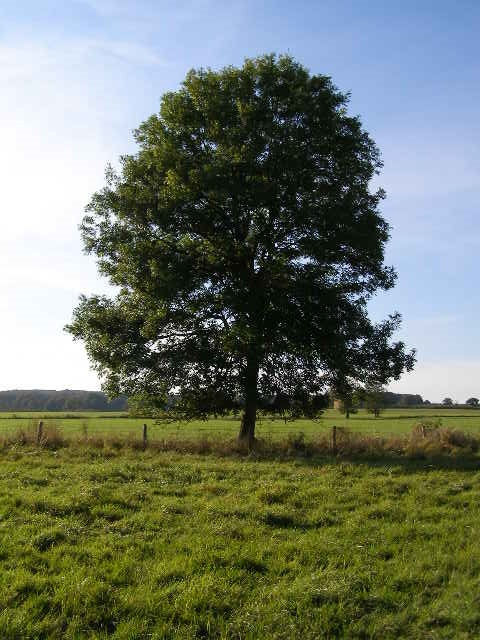

In [104]:
#{tree-image vega-lite-plot m  tex }


# tableplot

In [105]:
(require '[scicloj.metamorph.ml.rdatasets :as rdatasets]
         '[scicloj.tableplot.v1.plotly :as plotly])
(-> (rdatasets/datasets-iris)
    (plotly/layer-point
     {:=x :sepal-length
      :=y :sepal-width}))

Register model:  :metamorph.ml/ols
Register model:  :fastmath/ols
Register model:  :metamorph.ml/dummy-regressor
